In [7]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import cv2
import latexify

In [8]:
# load image
img = plt.imread('image.png')

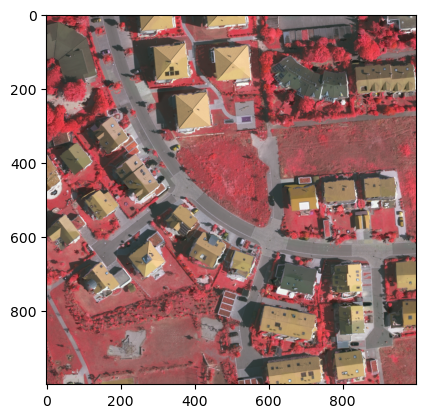

In [17]:
plt.imshow(img)

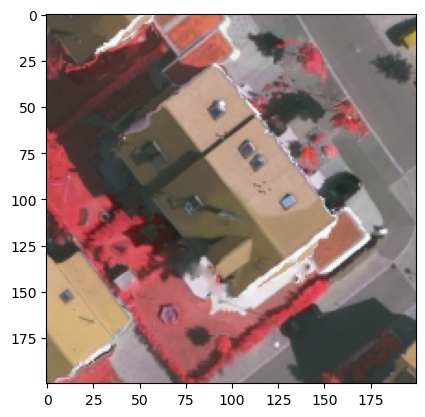

In [35]:
# Crop image
crop_img = img[350:550, 150:350]

plt.imshow(crop_img)

In [47]:
def convolve2d(image, kernel, stride=(1, 1), padding=0):
    # Convert the input image to a NumPy array
    image_np = np.array(image)
    
    # Add padding to the input image
    image_padded = cv2.copyMakeBorder(image_np, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)
    
    # Perform convolution
    output = cv2.filter2D(image_padded, -1, kernel, delta=0, borderType=cv2.BORDER_CONSTANT)
    
    # Apply ReLU activation function
    output = np.maximum(output, 0)
    
    # Apply stride
    output = output[::stride[0], ::stride[1]]
    
    return output

In [43]:
# Define kernel for sharpening
sharpening = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])

# Define kernel for blurring
blurring = np.array([[1/9, 1/9, 1/9], 
                     [1/9, 1/9, 1/9], 
                     [1/9, 1/9, 1/9]])

# Define kernel for embossing
embossing = np.array([[-2, -1, 0], 
                      [-1, 1, 1], 
                      [0, 1, 2]])

# Example kernels
gaussian_kernel = np.array([[21, 31, 21],
                            [31, 48, 31],
                            [21, 31, 21]])/200*1.05

kernel = [sharpening, blurring, embossing, gaussian_kernel]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


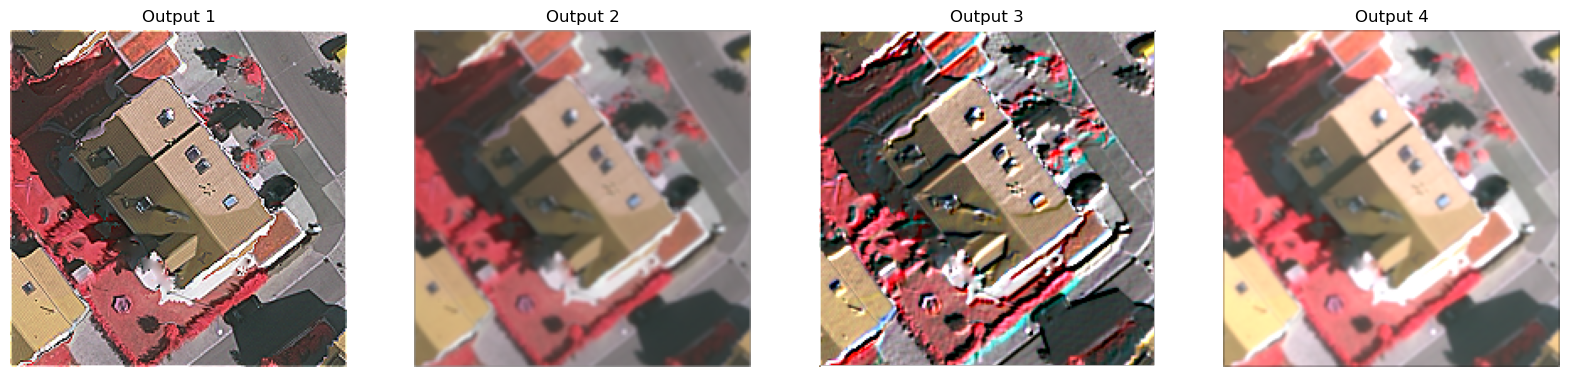

In [44]:
# Apply convolution
output = []
for i in range(4):
    output.append(convolve2d(crop_img, kernel[i]))
    
# Display the output
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(4):
    axs[i].imshow(output[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Output {i+1}')
plt.show()

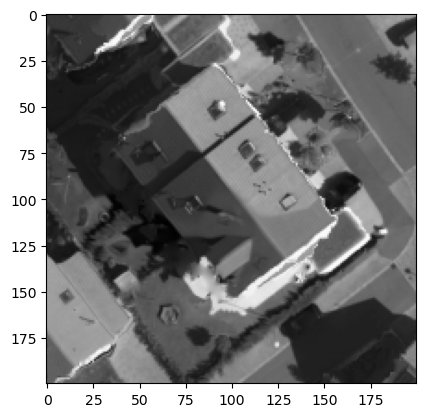

In [45]:
# Convert crop_img to grayscale
gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

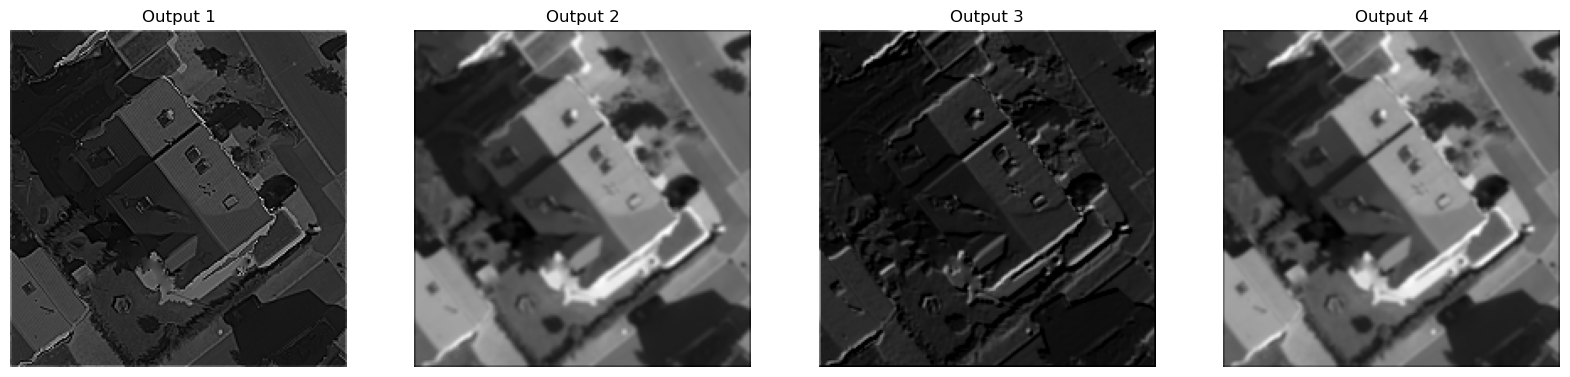

In [46]:
# Apply convolution
output = []
for i in range(4):
    output.append(convolve2d(gray_img, kernel[i]))
    
# Display the output
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(4):
    axs[i].imshow(output[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Output {i+1}')
plt.show()